# 3-2. Analyze Extracted Job Skills

Job posting data is provided by: https://www.kaggle.com/datasets/arshkon/linkedin-job-postings

Author: Yu Kyung Koh

Last Updated: 2025/05/17

In [2]:
import pandas as pd
import os
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

## SECTION 1: Wordcloud for most required skill for each category

In [4]:
## Import cleaned data from STEP 3-1
cleandatadir = '/Users/yukyungkoh/Desktop/1_Post-PhD/7_Python-projects/2_practice-NLP_job-posting/2_data/cleaned_data'
jobdata = os.path.join(cleandatadir, '3_job-posting_skills-extracted_df.pkl')
jobs_df = pd.read_pickle(jobdata, 'zip')

In [5]:
jobs_df.head(10)

,job_id,company_name,title,work_type,normalized_salary,combined_desc,job_category,combined_desc_corrected,skills_extracted
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,FULL_TIME,38480.0,Job description A leading real estate firm in ...,Marketing,job description a leading real estate firm in ...,"[graphic design, social media, online advertis..."
2,10998357,The National Exemplar,Assitant Restaurant Manager,FULL_TIME,55000.0,The National Exemplar is accepting application...,Other Manager,the national exemplar is accepting application...,[restaurant management]
12,56482768,NaN,Appalachian Highlands Women's Business Center,FULL_TIME,NaN,FULL JOB DESCRIPTION – PROGRAM DIRECTOR Appala...,Business/Finance Job,full job description – program director appala...,"[social media, programming, technical leadersh..."
14,69333422,Staffing Theory,Senior Product Marketing Manager,FULL_TIME,NaN,A leading pharmaceutical company committed to ...,Marketing,a leading pharmaceutical company committed to ...,"[market environment, patient advocacy, promoti..."
18,111513530,United Methodists of Greater New Jersey,"Content Writer, Communications",FULL_TIME,NaN,"Application opening date : April 24, 2024\nTit...",Marketing,"application opening date : april 24, 2024 titl...","[jersey, journalism, photography, seo tools, m..."
22,133130219,NaN,Software Engineer,FULL_TIME,NaN,"Education Bachelor ' s degree in software , ma...",Software/Developer,"education bachelor ' s degree in software , ma...",[]
26,175485704,GOYT,Software Engineer,PART_TIME,NaN,Job Description : GOYT is seeking a skilled an...,Software/Developer,job description : goyt is seeking a skilled an...,"[emerging technologies, relational databases, ..."
35,266566927,Revesco Properties,Marketing & Office Coordinator,FULL_TIME,65000.0,About Revesco Properties : Revesco Properties ...,Marketing,about revesco properties : revesco properties ...,"[social media, brand management, event plannin..."
46,805229245,NaN,"Manager, Retail Pharmacy",FULL_TIME,137500.0,SUMMARY : Manages operation and supervises all...,Other Manager,summary : manages operation and supervises all...,"[pharmacy systems, pharmacy experience, pharma..."
47,844454682,NaN,Commercial Property Manager,FULL_TIME,NaN,Gordon Partners ( www . gordonpartners . com )...,Other Manager,gordon partners ( www . gordonpartners . com )...,"[property management, yardi, vendor contracts,..."


In [6]:
#jobs_df["skills_temp"][7]

In [7]:
#jobs_df["skills_extracted"][7]

In [8]:
# Group by job category and count skills
grouped_skills = jobs_df.groupby("job_category")["skills_extracted"].apply(
    lambda lists: sum(lists.dropna().tolist(), [])  # flatten the list of lists
)

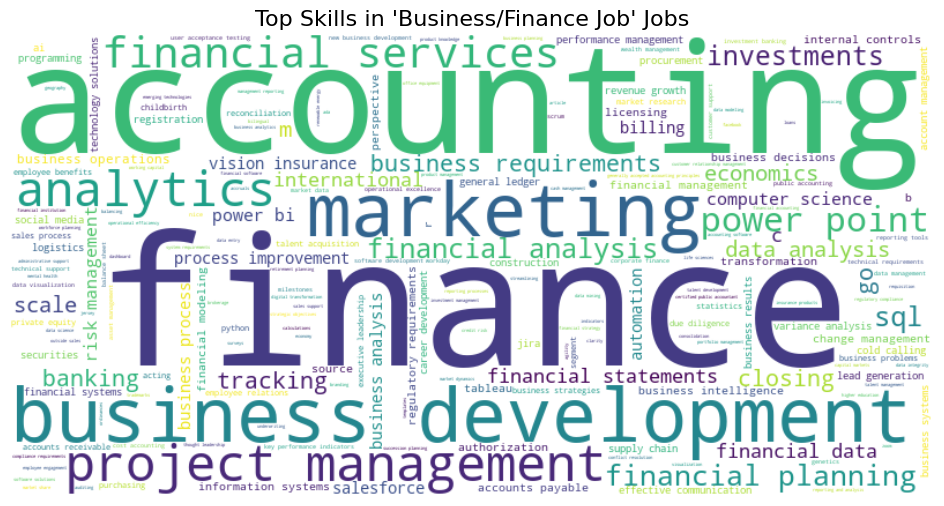

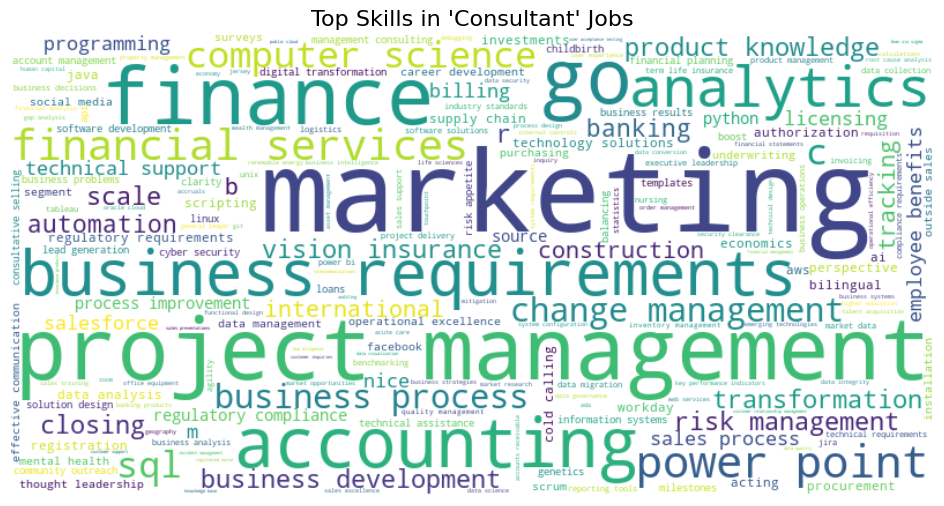

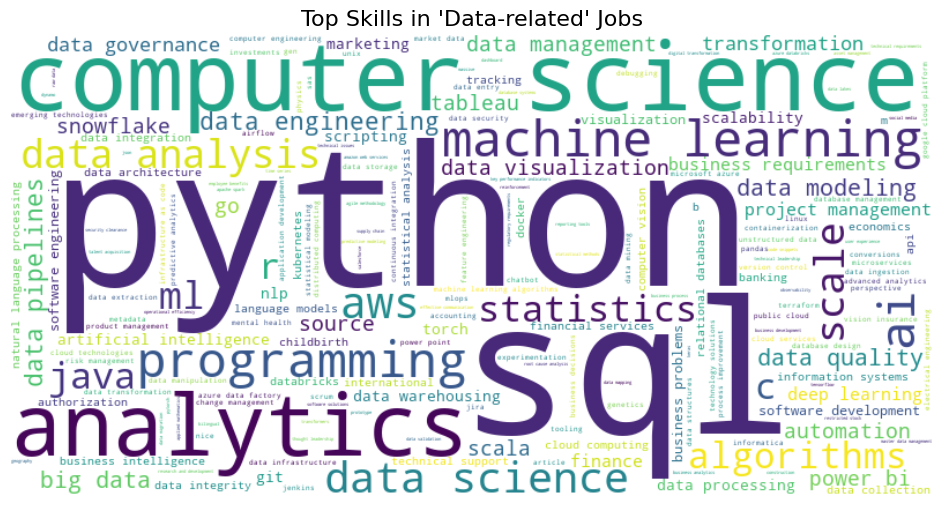

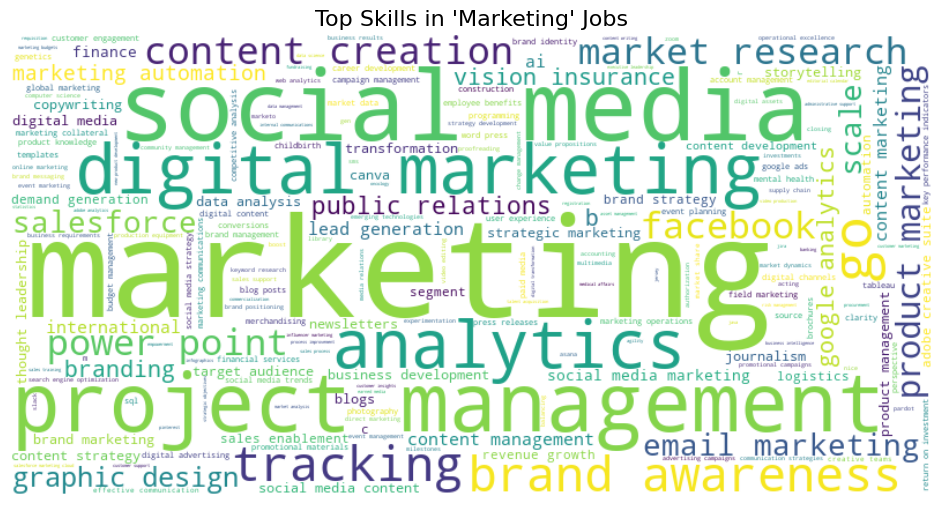

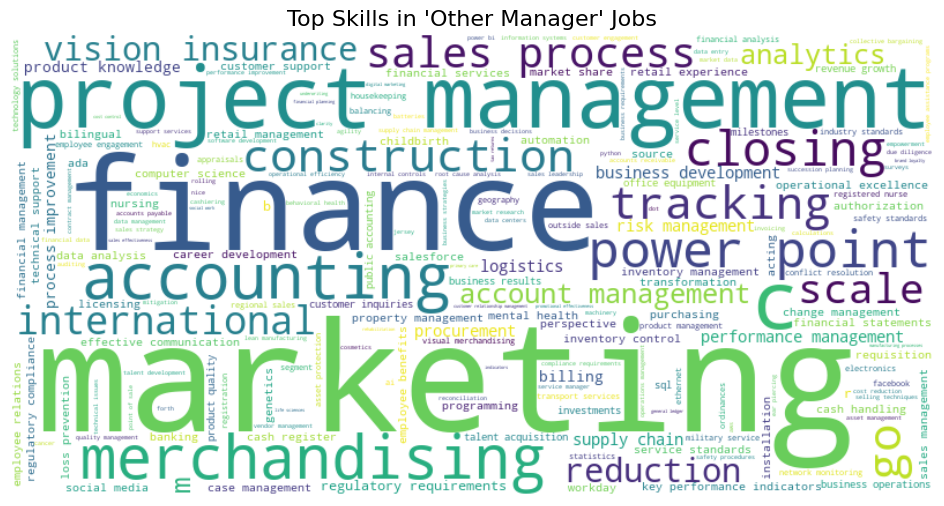

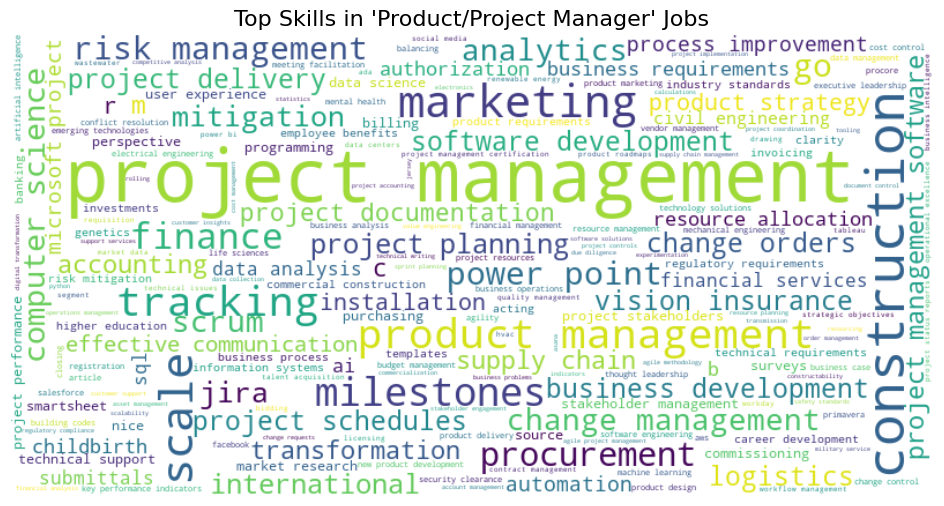

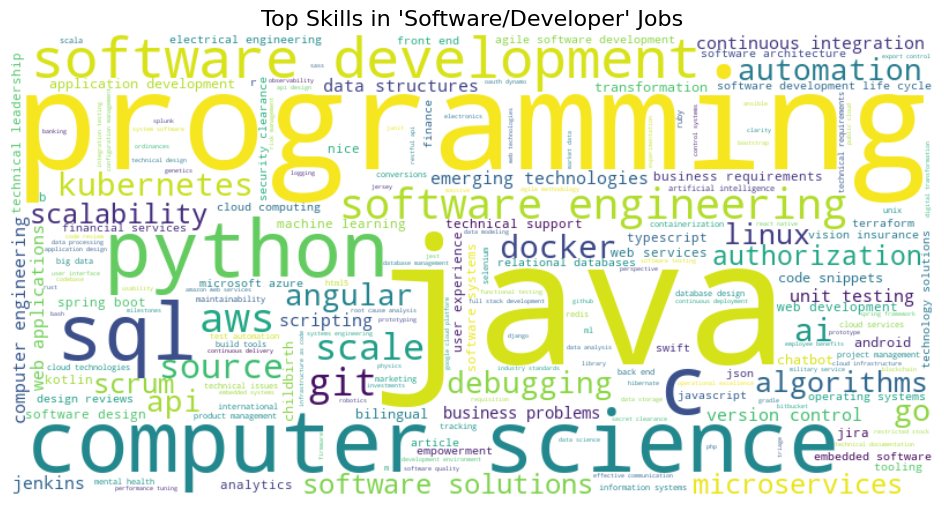

In [9]:

# Loop through each category and create word clouds
for category, skills in grouped_skills.items():
    if not skills:  # skip if empty
        continue

    # Count frequency of each skill
    skill_freq = Counter(skills)

    # Create and configure WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
    wordcloud.generate_from_frequencies(skill_freq)

    # Plot the WordCloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Top Skills in '{category}' Jobs", fontsize=16)
    plt.show()